In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import joblib

In [2]:
df = pd.read_excel('camp.xlsx')
df

,Session campaign,Session source / medium,Active users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per active user,Events per session,Engagement rate,Event count,Key events,revenue,Session key event rate
0,(direct),(direct) / (none),7964439,43619358,32665439,119.854648,4.101411,36.276668,0.748875,1582364972,410076892,5.393744e+08,0.997271
1,(organic),google / organic,34796114,53100247,29480626,51.210698,0.847239,5.663962,0.555188,300757800,57399532,5.388220e+07,1.000000
2,(not set),google-play / organic,505091,7856222,5147438,60.619641,10.191110,9.588571,0.655205,75329939,32113728,2.706024e+07,0.999683
3,(not set),(not set),1446718,1291107,330717,82.102103,0.228598,14.374894,0.256150,18559526,3128816,7.066642e+06,0.563894
4,Promo Bar,Website / (not set),40139,594395,409261,72.506582,10.196094,10.558013,0.688534,6275630,2435656,3.877344e+06,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Instagram paid ad - Magazine offer - 21 Jun - ...,Instagram paid ad - Magazine offer - 21 Jun - ...,103,138,71,19.760870,0.689320,5.586957,0.514493,771,145,0.000000e+00,1.000000
5996,Instagram paid ad - Weekend offers Personal ca...,Instagram paid ad - Weekend offers Personal ca...,109,139,56,31.884892,0.513761,5.546763,0.402878,771,142,0.000000e+00,1.000000
5997,Emarsys - magazine offers 08 - 12 November - f...,Emarsys - magazine offers 08 - 12 November - f...,94,118,57,43.305085,0.606383,6.525424,0.483051,770,121,0.000000e+00,1.000000
5998,Facebook Paid Ad - Weekend offers - BIODERMA -...,Paid Ad / Facebook,87,131,69,65.038168,0.793103,5.877863,0.526718,770,176,0.000000e+00,1.000000


In [3]:
df.drop(['Session campaign','Session source / medium'], axis = 1, inplace = True)

In [4]:
df.columns

Index(['Active users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session',
       'Engaged sessions per active user', 'Events per session',
       'Engagement rate', 'Event count', 'Key events', 'revenue',
       'Session key event rate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Active users                         6000 non-null   int64  
 1   Sessions                             6000 non-null   int64  
 2   Engaged sessions                     6000 non-null   int64  
 3   Average engagement time per session  6000 non-null   float64
 4   Engaged sessions per active user     6000 non-null   float64
 5   Events per session                   6000 non-null   float64
 6   Engagement rate                      6000 non-null   float64
 7   Event count                          6000 non-null   int64  
 8   Key events                           6000 non-null   int64  
 9   revenue                              6000 non-null   float64
 10  Session key event rate               6000 non-null   float64
dtypes: float64(6), int64(5)
memory

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Active users                           0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per active user       0
Events per session                     0
Engagement rate                        0
Event count                            0
Key events                             0
revenue                                0
Session key event rate                 0
dtype: int64

In [8]:
df['revenue'] = df['revenue'].apply(lambda x : 1 if x > 0 else  0 )

In [9]:
df['revenue'].value_counts()

revenue
0    3324
1    2676
Name: count, dtype: int64

<Axes: xlabel='revenue', ylabel='count'>

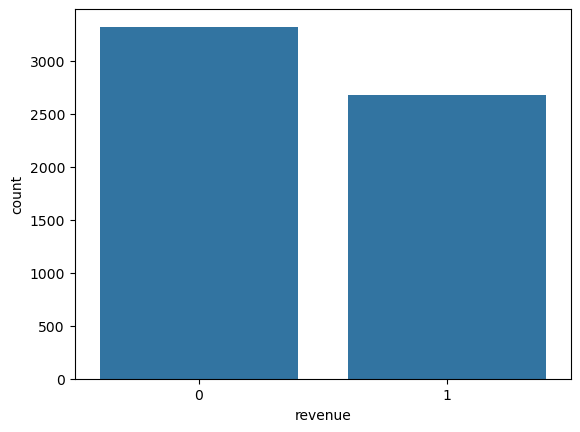

In [10]:
sns.countplot(data=df, x='revenue')

<Axes: >

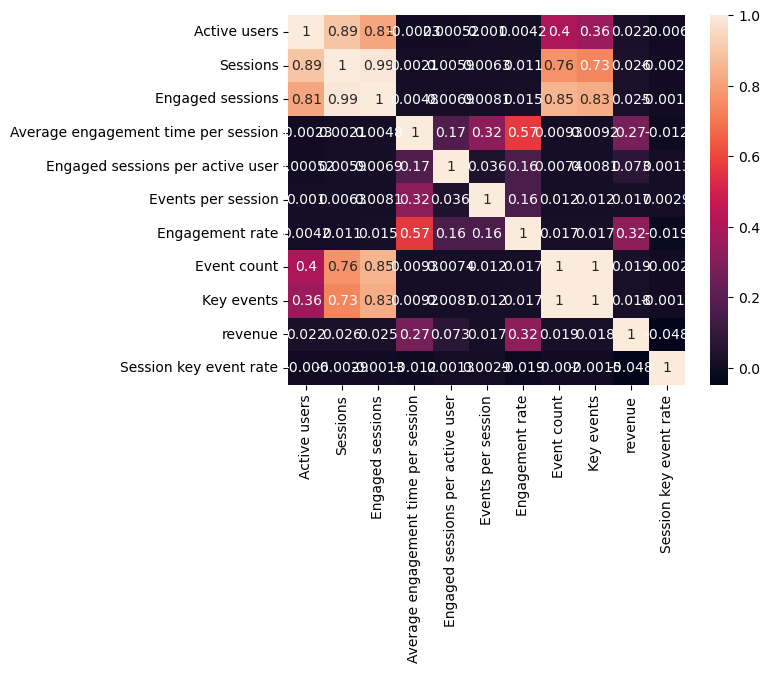

In [11]:
sns.heatmap(data = df.corr(), annot = True )

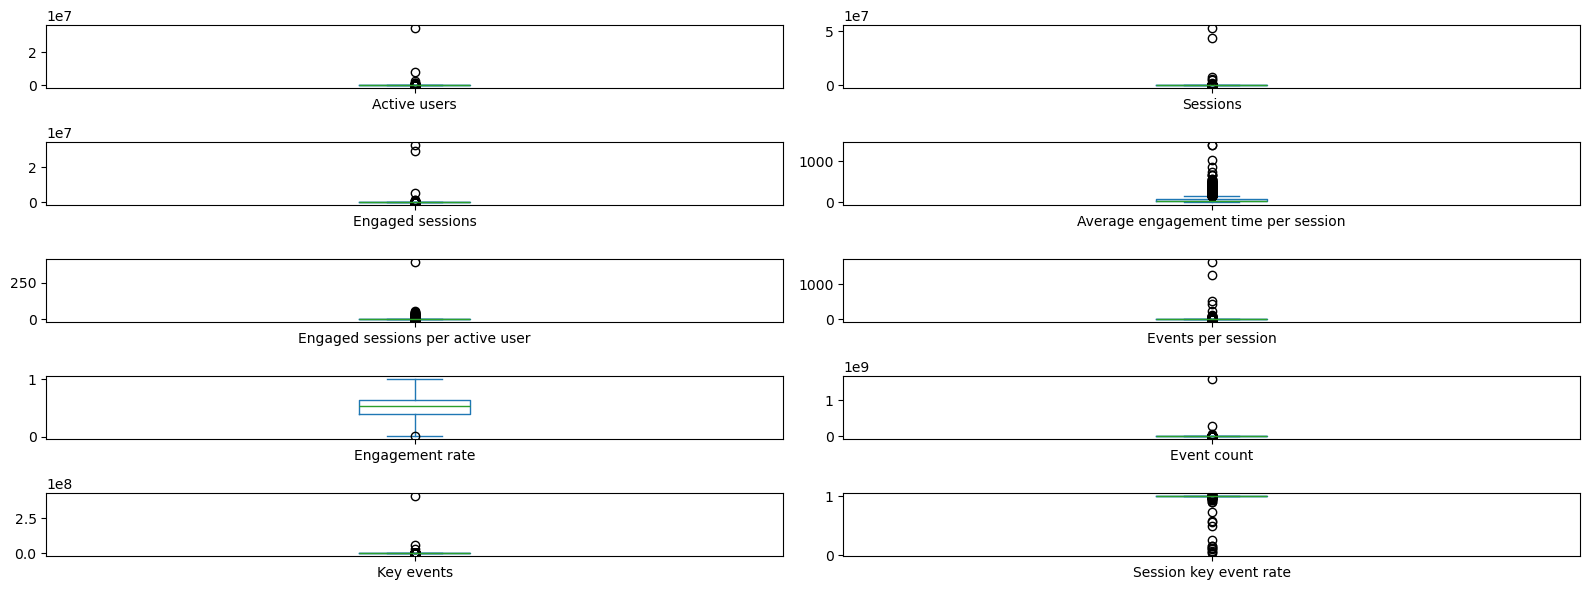

In [12]:
numeric_features = df.drop(columns='revenue').columns
df[numeric_features].plot(kind='box', figsize=(16, 6), subplots=True, layout=(5, 2), sharey=False)
plt.tight_layout()
plt.show()

In [13]:
df.describe()

,Active users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per active user,Events per session,Engagement rate,Event count,Key events,revenue,Session key event rate
count,6.000000e+03,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000
mean,9.888634e+03,2.207435e+04,1.306348e+04,63.819630,1.183380,8.634697,0.498835,3.527760e+05,8.931782e+04,0.446000,0.998117
std,4.633973e+05,8.991241e+05,5.730060e+05,71.404177,5.683485,28.519330,0.203127,2.082132e+07,5.362987e+06,0.497117,0.035916
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.003929,1.470000,0.003914,1.400000e+01,2.000000e+00,0.000000,0.030000
25%,1.060000e+02,1.590000e+02,6.700000e+01,24.729648,0.499559,4.747477,0.384849,1.111000e+03,1.780000e+02,0.000000,1.000000
50%,2.695000e+02,3.650000e+02,1.470000e+02,45.797942,0.692901,6.566116,0.526752,2.239000e+03,3.950000e+02,0.000000,1.000000
75%,7.690000e+02,9.535000e+02,4.030000e+02,79.385452,0.869565,9.103301,0.638298,5.795500e+03,1.020500e+03,1.000000,1.000000
max,3.479611e+07,5.310025e+07,3.266544e+07,1391.000000,392.000000,1629.625000,1.000000,1.582365e+09,4.100769e+08,1.000000,1.000000


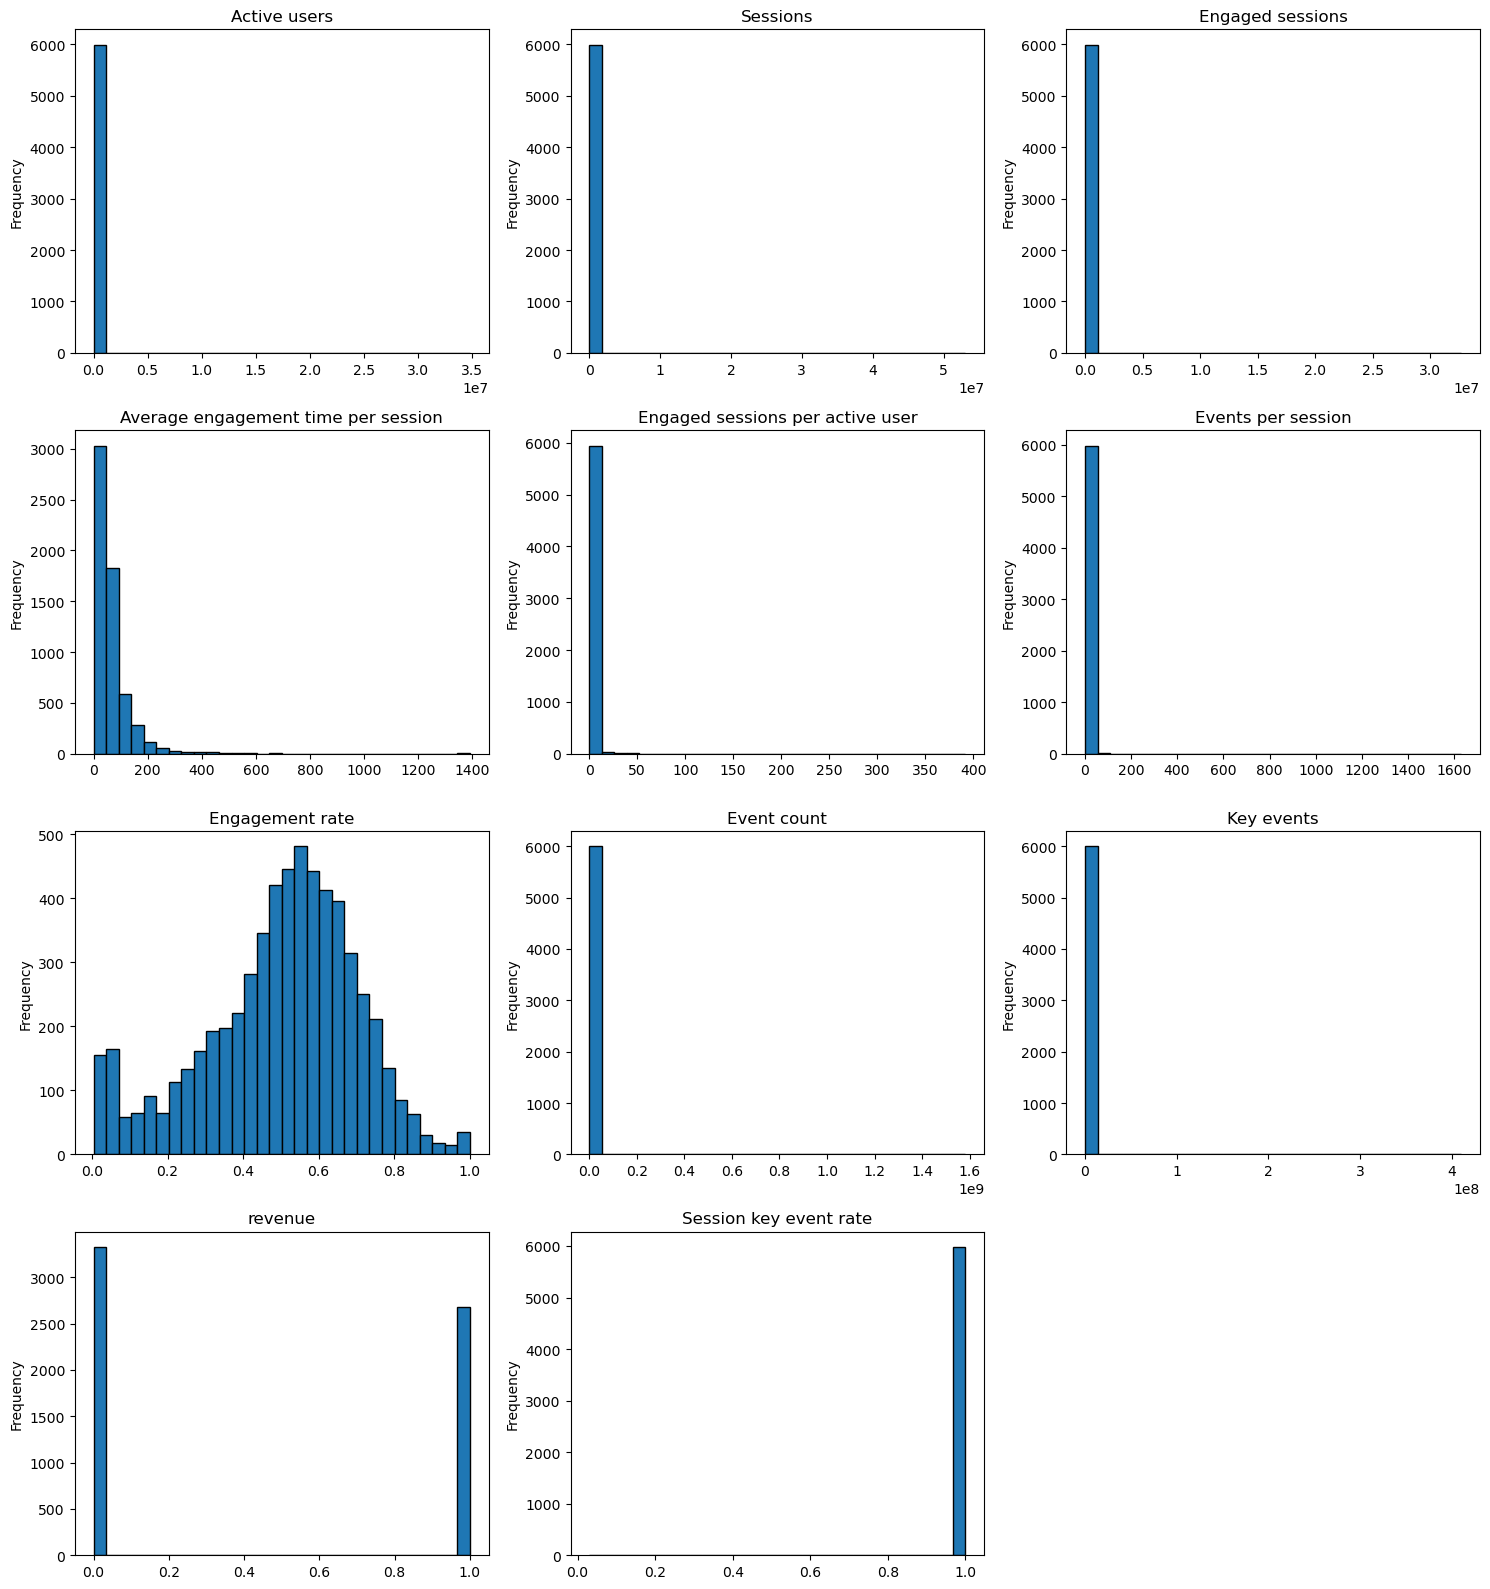

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].plot.hist(bins=30, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [15]:
df.drop(['Session key event rate'], axis = 1 , inplace=True)

In [16]:
high_skew_cols = ['Active users', 'Sessions', 'Event count', 'Key events']
df[high_skew_cols] = df[high_skew_cols].apply(lambda x: np.log1p(x))

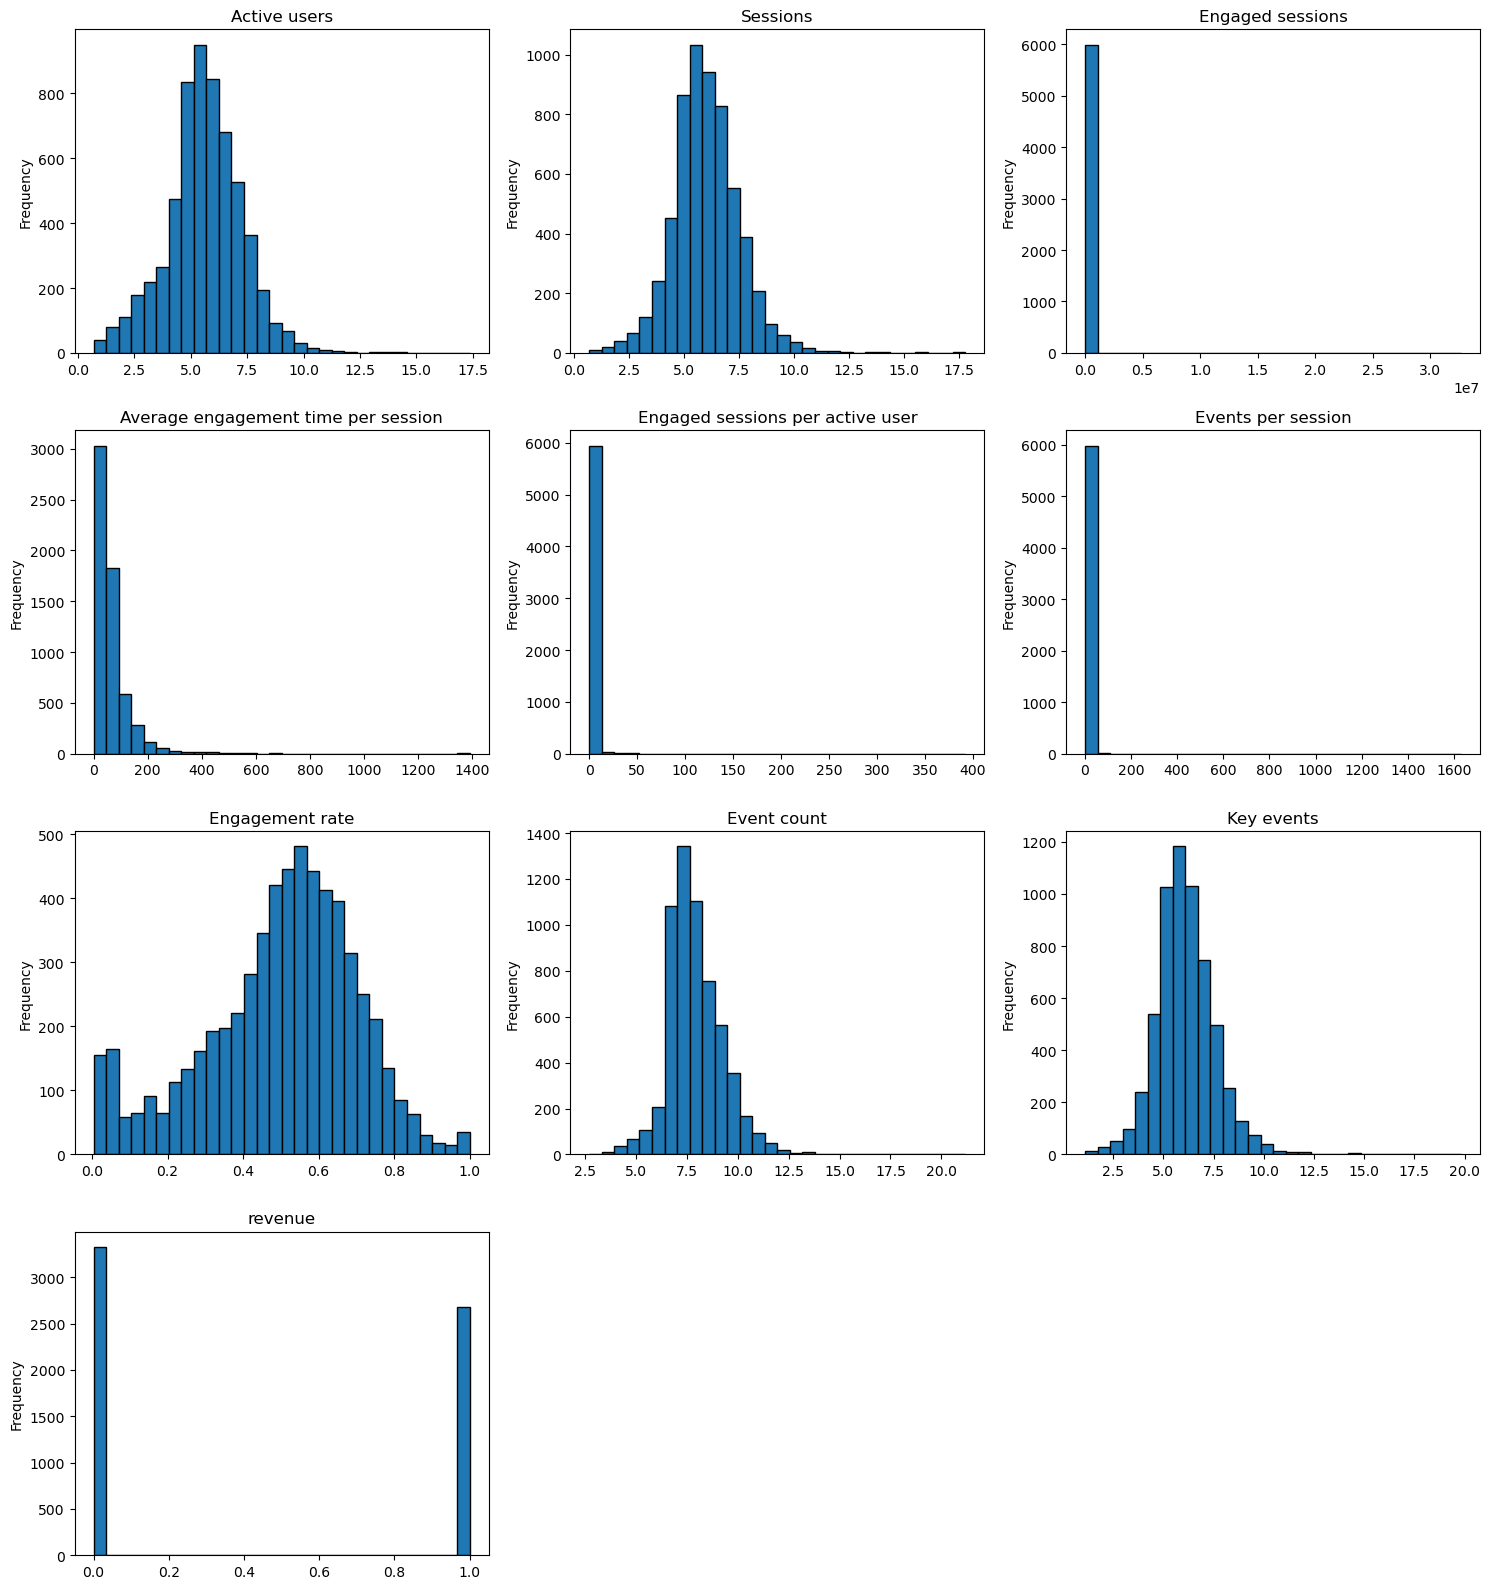

In [17]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].plot.hist(bins=30, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()

<Axes: >

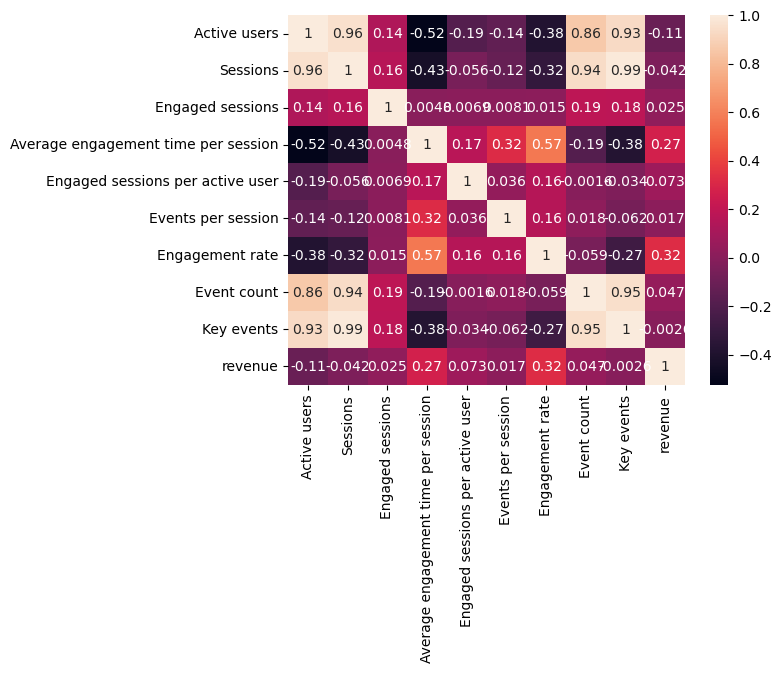

In [18]:
sns.heatmap(data = df.corr(), annot = True )

In [27]:
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures , OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , RocCurveDisplay

from sklearn.model_selection import train_test_split , cross_validate , StratifiedKFold , GridSearchCV , RandomizedSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [20]:
df.columns

Index(['Active users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session',
       'Engaged sessions per active user', 'Events per session',
       'Engagement rate', 'Event count', 'Key events', 'revenue'],
      dtype='object')

In [21]:
x , y = df[df.columns[:-1]] , df['revenue']

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0 , stratify=y)

In [23]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [24]:
def Modeling(x_train , x_test ,y_train , y_test , model_name):
    
    # pipeline building
    pl = make_pipeline(StandardScaler() , model_name)

    # pipeline fit 
    pl.fit(x_train , y_train)

    # pipeline predict
    y_train_prd = pl.predict(x_train)
    y_test_prd = pl.predict(x_test)

    # pipeline evaluation accuracy
    print(f'Train Acc : {accuracy_score(y_train , y_train_prd)}')
    print(f'Test Acc : {accuracy_score(y_test , y_test_prd)}')

    # pipeline evaluation recall
    print(f'Train recall : {recall_score(y_train , y_train_prd )}')
    print(f'Test recall : {recall_score(y_test , y_test_prd )}')

    # pipeline evaluation precision
    print(f'Train precision : {precision_score(y_train , y_train_prd)}')
    print(f'Test precision : {precision_score(y_test , y_test_prd)}')

    # pipeline evaluation f1 score
    print(f'Train f1_score : {f1_score(y_train , y_train_prd)}')
    print(f'Test f1_score : {f1_score(y_test , y_test_prd)}')

    # confusion matrix 
    train_con_mat = ConfusionMatrixDisplay(confusion_matrix(y_train , y_train_prd))
    plt.figure()
    train_con_mat.plot()
    plt.title(f'Train -- {model_name}')
    plt.show()

    test_con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , y_test_prd))
    plt.figure()
    test_con_mat.plot()
    plt.title(f'Test -- {model_name}')
    plt.show()

Train Acc : 0.7077083333333334
Test Acc : 0.7008333333333333
Train recall : 0.5324614666043904
Test recall : 0.5364485981308411
Train precision : 0.7392996108949417
Test precision : 0.7211055276381909
Train f1_score : 0.6190605484659246
Test f1_score : 0.6152197213290461


<Figure size 640x480 with 0 Axes>

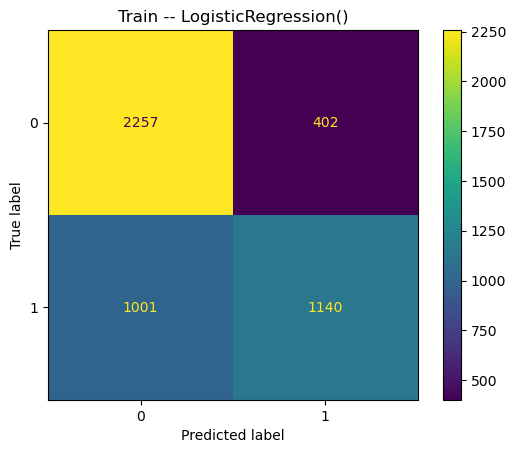

<Figure size 640x480 with 0 Axes>

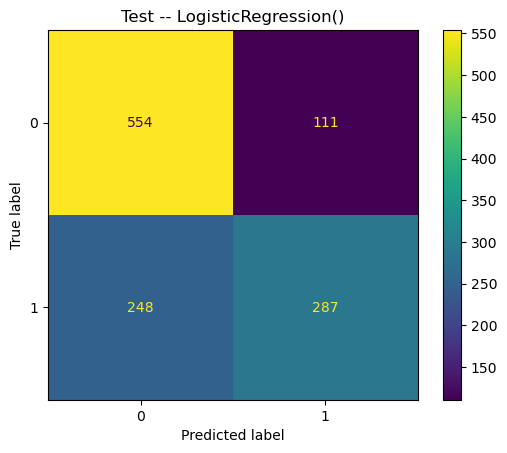

Train Acc : 0.8139583333333333
Test Acc : 0.7308333333333333
Train recall : 0.7575899112564223
Test recall : 0.6766355140186916
Train precision : 0.812625250501002
Test precision : 0.70703125
Train f1_score : 0.7841430988639111
Test f1_score : 0.6914995224450812


<Figure size 640x480 with 0 Axes>

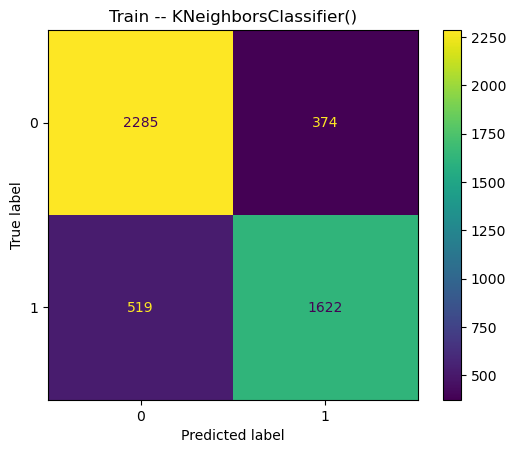

<Figure size 640x480 with 0 Axes>

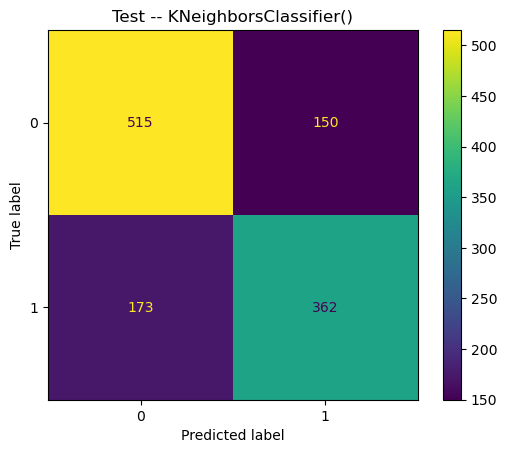

Train Acc : 0.60875
Test Acc : 0.615
Train recall : 0.15787015413358244
Test recall : 0.17196261682242991
Train precision : 0.8184019370460048
Test precision : 0.8288288288288288
Train f1_score : 0.26468285043069695
Test f1_score : 0.28482972136222906


<Figure size 640x480 with 0 Axes>

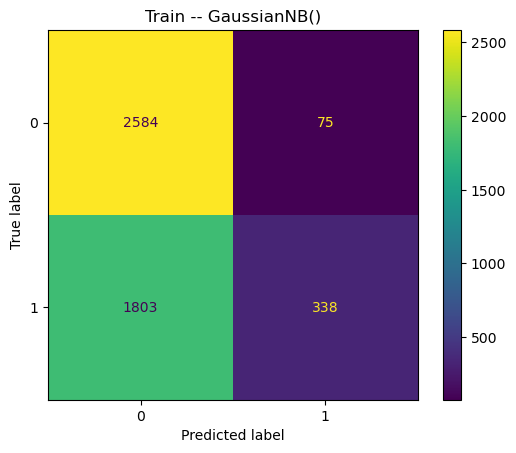

<Figure size 640x480 with 0 Axes>

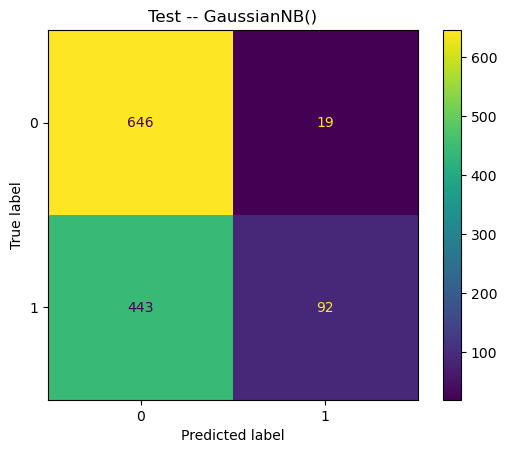

Train Acc : 0.7641666666666667
Test Acc : 0.7691666666666667
Train recall : 0.6637085474077534
Test recall : 0.6990654205607477
Train precision : 0.7752318603382433
Test precision : 0.763265306122449
Train f1_score : 0.7151484650226473
Test f1_score : 0.7297560975609756


<Figure size 640x480 with 0 Axes>

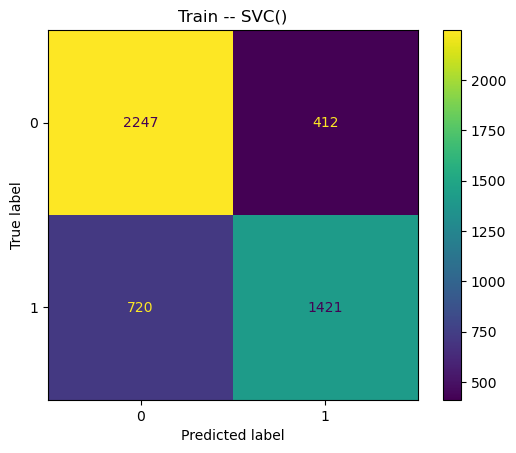

<Figure size 640x480 with 0 Axes>

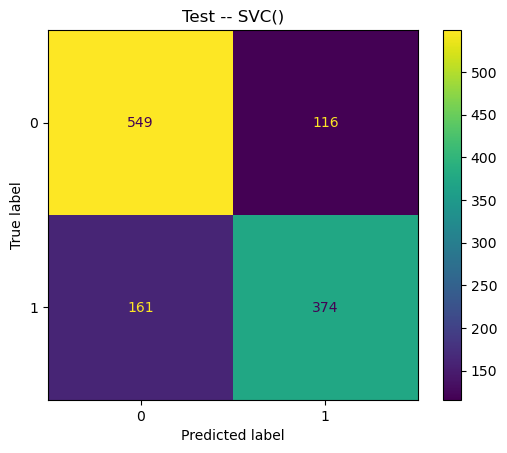

Train Acc : 1.0
Test Acc : 0.7266666666666667
Train recall : 1.0
Test recall : 0.6934579439252336
Train precision : 1.0
Test precision : 0.6934579439252336
Train f1_score : 1.0
Test f1_score : 0.6934579439252336


<Figure size 640x480 with 0 Axes>

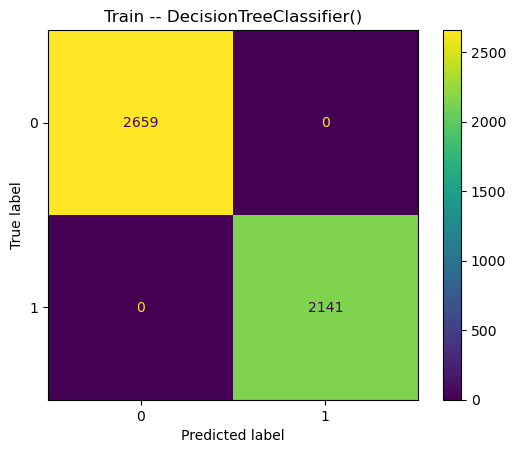

<Figure size 640x480 with 0 Axes>

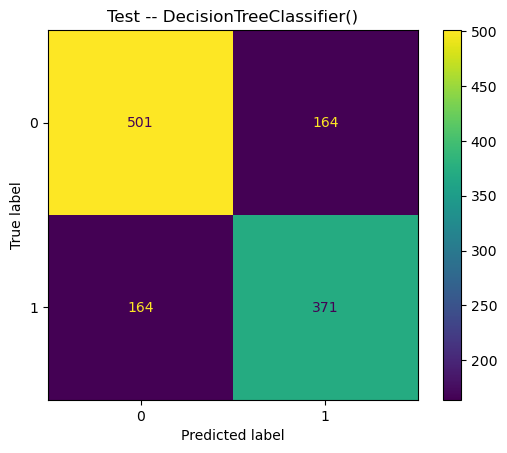

Train Acc : 1.0
Test Acc : 0.7691666666666667
Train recall : 1.0
Test recall : 0.7308411214953271
Train precision : 1.0
Test precision : 0.7461832061068703
Train f1_score : 1.0
Test f1_score : 0.7384324834749764


<Figure size 640x480 with 0 Axes>

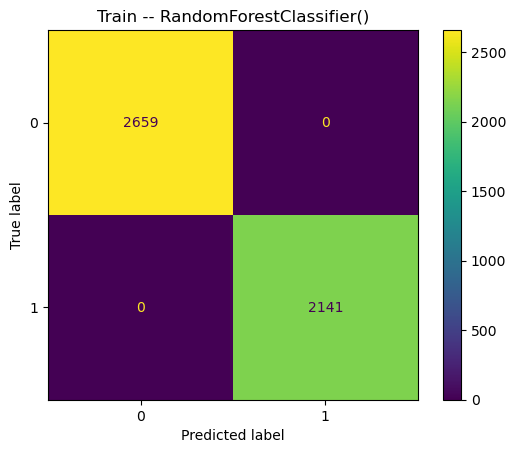

<Figure size 640x480 with 0 Axes>

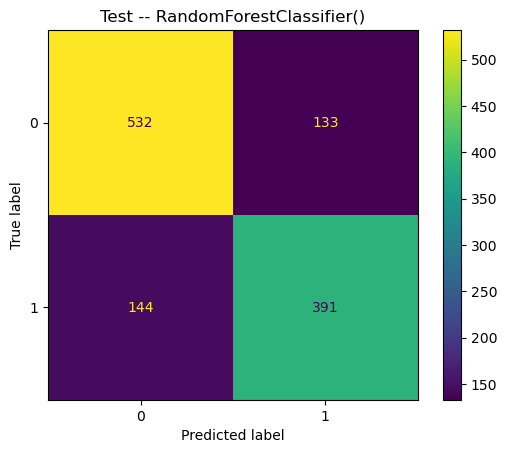

Train Acc : 0.7754166666666666
Test Acc : 0.7658333333333334
Train recall : 0.7048108360579168
Test recall : 0.7121495327102804
Train precision : 0.7718670076726343
Test precision : 0.75
Train f1_score : 0.73681640625
Test f1_score : 0.7305848513902204


<Figure size 640x480 with 0 Axes>

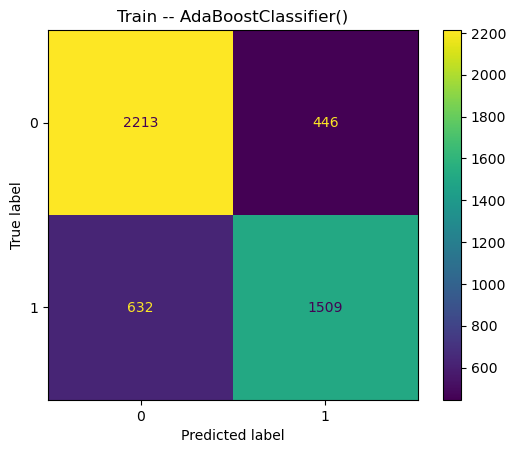

<Figure size 640x480 with 0 Axes>

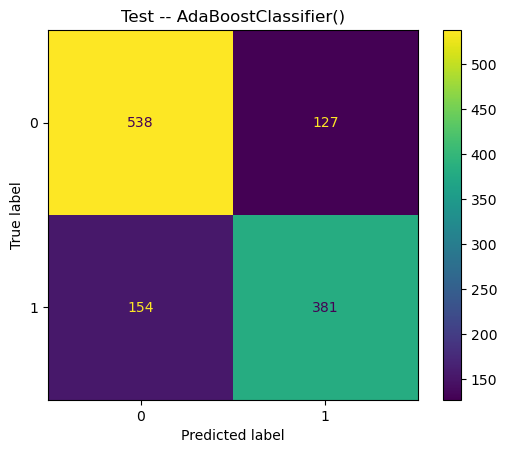

Train Acc : 0.8133333333333334
Test Acc : 0.7866666666666666
Train recall : 0.7459131247080804
Test recall : 0.7364485981308411
Train precision : 0.8193945613134941
Test precision : 0.7740667976424361
Train f1_score : 0.7809290953545232
Test f1_score : 0.7547892720306514


<Figure size 640x480 with 0 Axes>

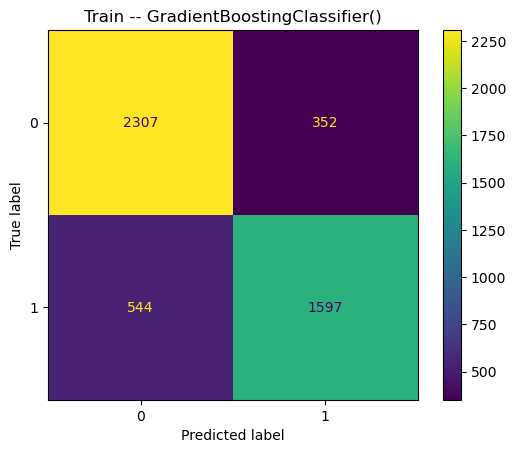

<Figure size 640x480 with 0 Axes>

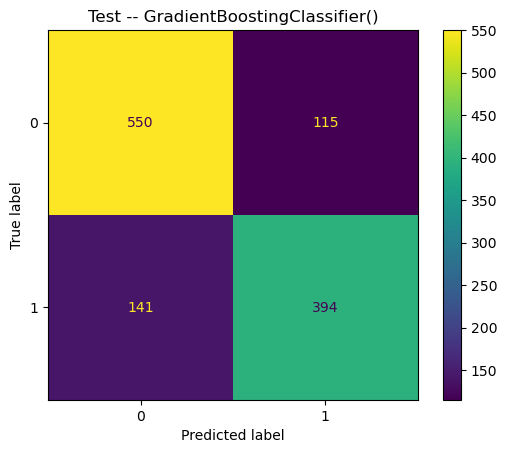

Train Acc : 0.9614583333333333
Test Acc : 0.7666666666666667
Train recall : 0.9425502101821579
Test recall : 0.7345794392523365
Train precision : 0.9701923076923077
Test precision : 0.7401129943502824
Train f1_score : 0.9561715233357024
Test f1_score : 0.7373358348968106


<Figure size 640x480 with 0 Axes>

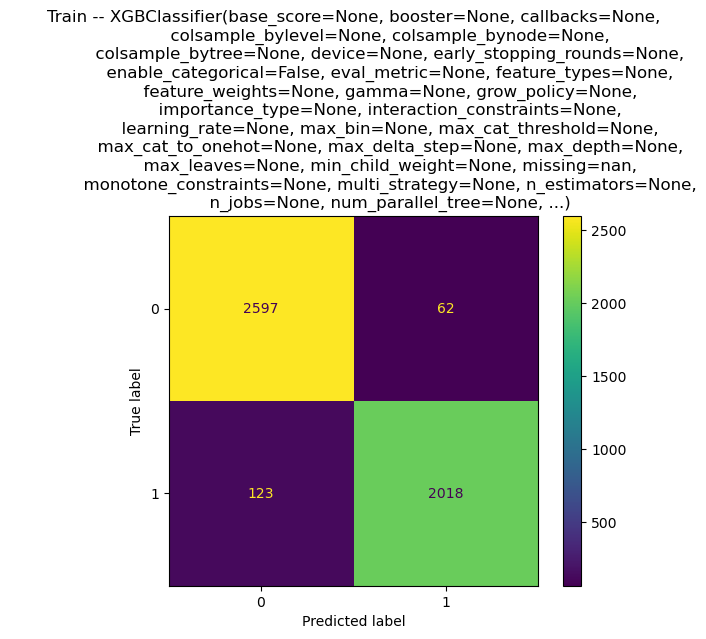

<Figure size 640x480 with 0 Axes>

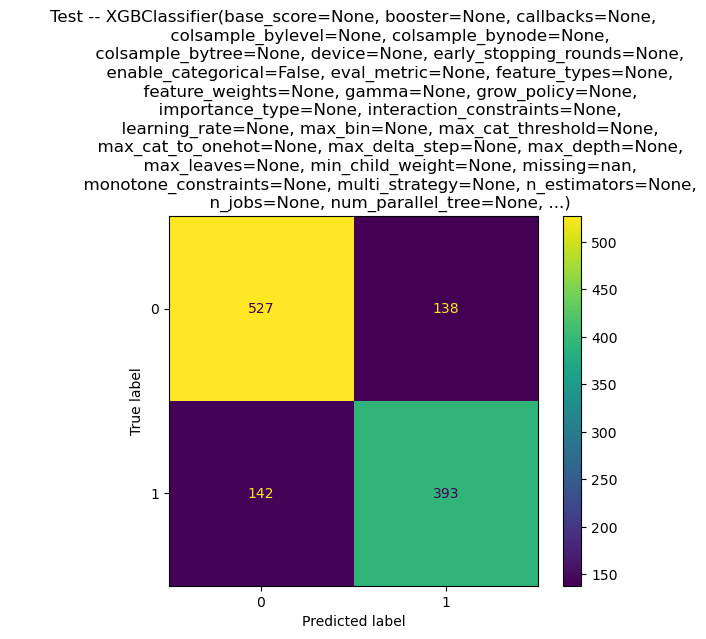

In [25]:
for model in models :

    Modeling(x_train , x_test ,y_train , y_test , model)

In [29]:
for model in models :
    
    pl = make_pipeline(StandardScaler() , model)

    cv = cross_validate(estimator=pl , 
                        X = x ,
                        y = y ,
                        cv = StratifiedKFold(n_splits=10) , 
                        scoring='accuracy',
                        return_train_score=True )

    print(model)
    print(f"Avg Train Score :{cv['train_score'].mean()}")
    print(f"Avg Test Score : {cv['test_score'].mean()}")
    print('-'*40)

LogisticRegression()
Avg Train Score :0.7136666666666667
Avg Test Score : 0.6758333333333333
----------------------------------------
KNeighborsClassifier()
Avg Train Score :0.8185
Avg Test Score : 0.5961666666666667
----------------------------------------
GaussianNB()
Avg Train Score :0.6189814814814816
Avg Test Score : 0.5823333333333333
----------------------------------------
SVC()
Avg Train Score :0.7709444444444445
Avg Test Score : 0.7071666666666667
----------------------------------------
DecisionTreeClassifier()
Avg Train Score :1.0
Avg Test Score : 0.4646666666666667
----------------------------------------
RandomForestClassifier()
Avg Train Score :1.0
Avg Test Score : 0.5193333333333333
----------------------------------------
AdaBoostClassifier()
Avg Train Score :0.794685185185185
Avg Test Score : 0.5085
----------------------------------------
GradientBoostingClassifier()
Avg Train Score :0.8247222222222224
Avg Test Score : 0.4545
----------------------------------------


In [30]:
lr = make_pipeline(StandardScaler() ,
                   PolynomialFeatures() ,
                   LogisticRegression(max_iter=10000))

In [31]:
lr_param = [
    {
        'logisticregression__C' : [0.1 , 0.5 , 1 , 5 , 10],
        'polynomialfeatures__degree' : [1,2,3,4,5]
    }
]

In [ ]:
lr

In [32]:
lr_srch = GridSearchCV(estimator=lr , 
                       param_grid=lr_param ,
                       scoring='accuracy' ,
                       cv = StratifiedKFold(n_splits=5) ,
                       return_train_score=True )

In [67]:
lr_srch.fit(x , y)

C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             param_grid=[{'logisticregression__C': [0.1, 0.5, 1, 5, 10],
                          'polynomialfeatures__degree': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='accuracy')

In [68]:
lr_srch.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('logisticregression',
                 LogisticRegression(C=0.5, max_iter=10000))])

In [69]:
lr_srch.best_score_

0.6886666666666666

In [33]:
svc_pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),  # Optional: increases feature complexity
    PCA(),
    SVC()
)

In [34]:
svc_param= {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],  # You can try 'poly' as well
    'polynomialfeatures__degree': [1, 2, 3],
    'pca__n_components': [0.95, 0.99, 10, 20] 
}

In [49]:
svc_search = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=svc_param,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    n_jobs=-1
)

In [51]:
svc_search.fit(x, y)

C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('pca', PCA()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.95, 0.99, 10, 20],
                         'polynomialfeatures__degree': [1, 2, 3],
                         'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [52]:
svc_search.best_score_

0.7445

In [36]:
x , y = df[['Active users', 'Sessions', 'Event count', 'Key events']] , df['revenue']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0 , stratify=y)

Train Acc : 0.6789583333333333
Test Acc : 0.6641666666666667
Train recall : 0.40308267164876227
Test recall : 0.411214953271028
Train precision : 0.7664298401420959
Test precision : 0.7142857142857143
Train f1_score : 0.5283134374043466
Test f1_score : 0.5219454329774615


<Figure size 640x480 with 0 Axes>

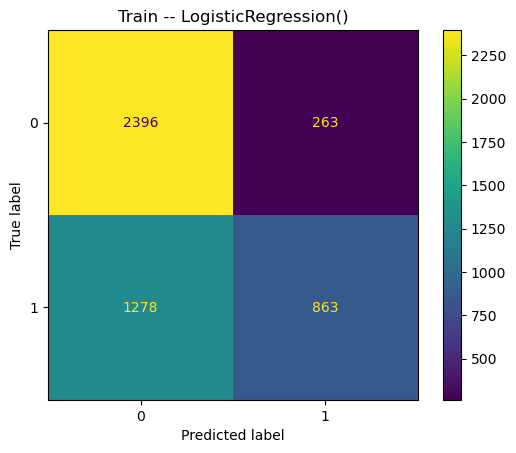

<Figure size 640x480 with 0 Axes>

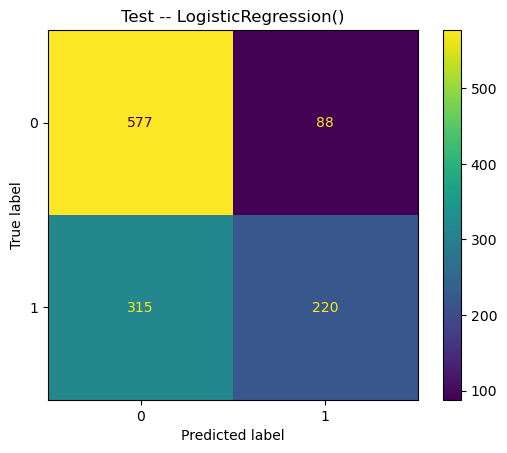

Train Acc : 0.8129166666666666
Test Acc : 0.7466666666666667
Train recall : 0.7580569827183559
Test recall : 0.6953271028037383
Train precision : 0.8102845731402896
Test precision : 0.7251461988304093
Train f1_score : 0.7833011583011582
Test f1_score : 0.7099236641221374


<Figure size 640x480 with 0 Axes>

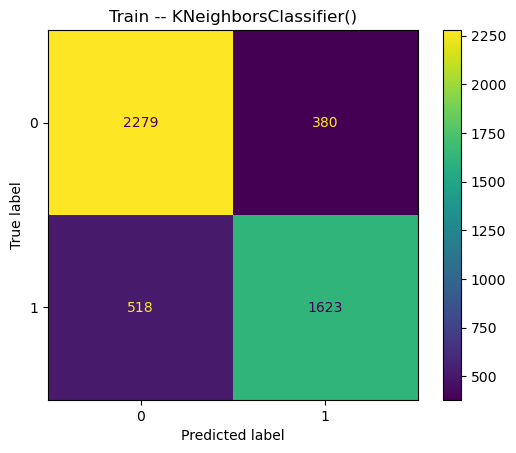

<Figure size 640x480 with 0 Axes>

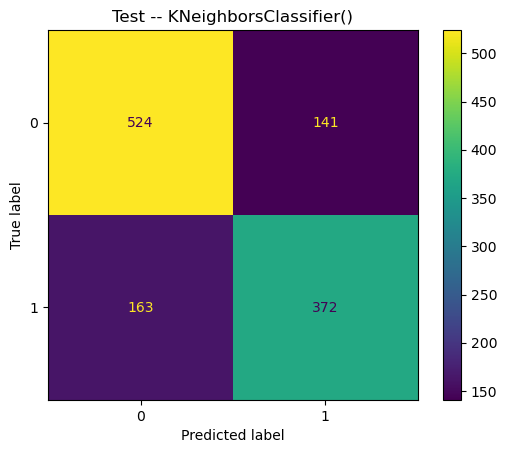

Train Acc : 0.6516666666666666
Test Acc : 0.6825
Train recall : 0.40541802895843065
Test recall : 0.45794392523364486
Train precision : 0.6850828729281768
Test precision : 0.7291666666666666
Train f1_score : 0.5093896713615024
Test f1_score : 0.5625717566016073


<Figure size 640x480 with 0 Axes>

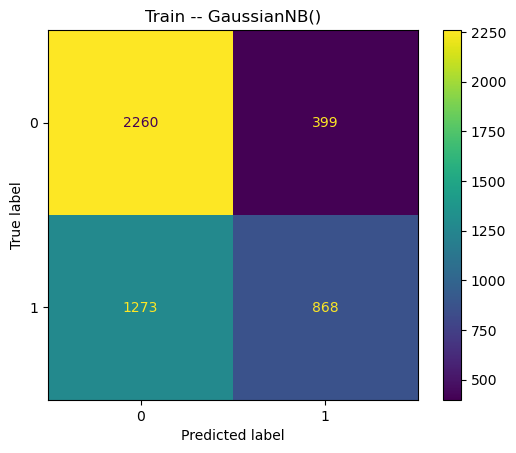

<Figure size 640x480 with 0 Axes>

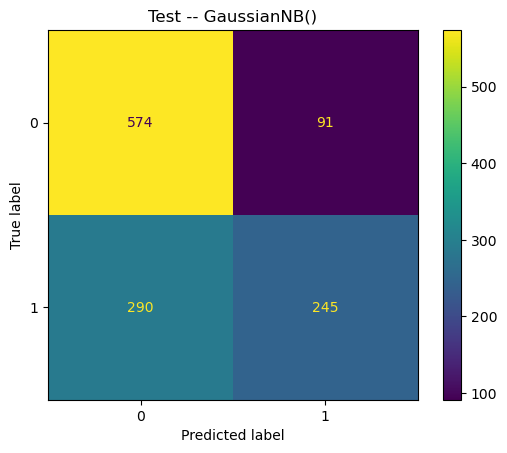

Train Acc : 0.7435416666666667
Test Acc : 0.7475
Train recall : 0.595049042503503
Test recall : 0.6037383177570094
Train precision : 0.7777777777777778
Test precision : 0.7801932367149759
Train f1_score : 0.6742524477374966
Test f1_score : 0.6807165437302424


<Figure size 640x480 with 0 Axes>

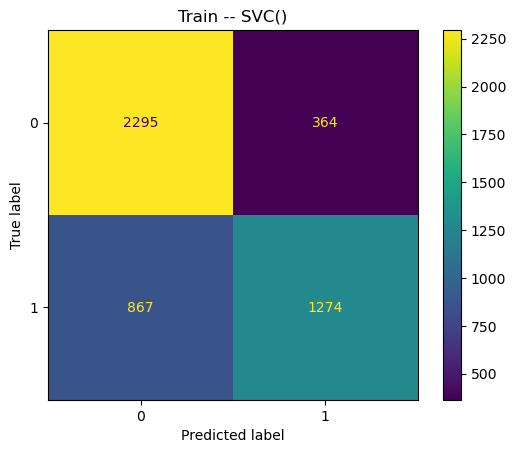

<Figure size 640x480 with 0 Axes>

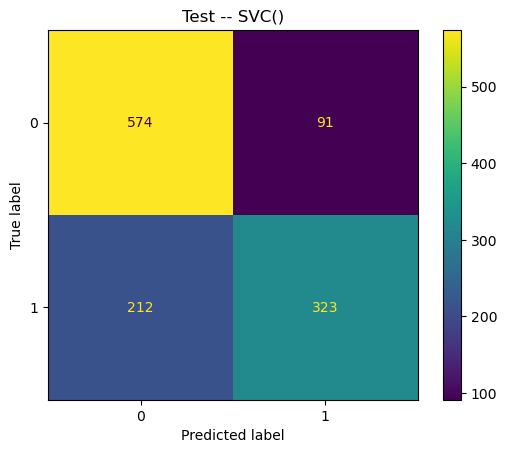

Train Acc : 1.0
Test Acc : 0.7066666666666667
Train recall : 1.0
Test recall : 0.6915887850467289
Train precision : 1.0
Test precision : 0.6642728904847397
Train f1_score : 1.0
Test f1_score : 0.6776556776556777


<Figure size 640x480 with 0 Axes>

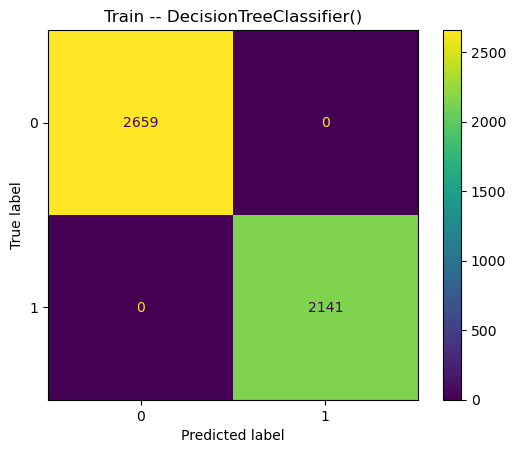

<Figure size 640x480 with 0 Axes>

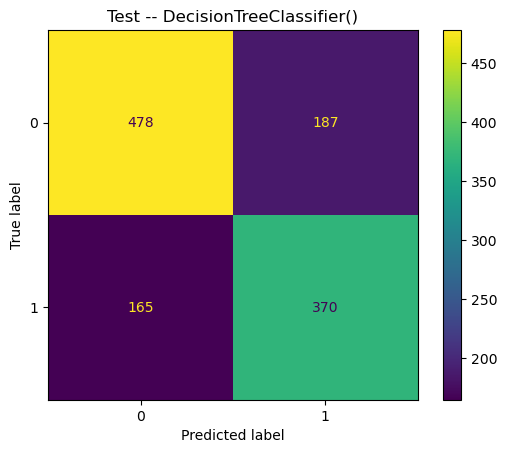

Train Acc : 1.0
Test Acc : 0.75
Train recall : 1.0
Test recall : 0.685981308411215
Train precision : 1.0
Test precision : 0.7354709418837675
Train f1_score : 1.0
Test f1_score : 0.7098646034816247


<Figure size 640x480 with 0 Axes>

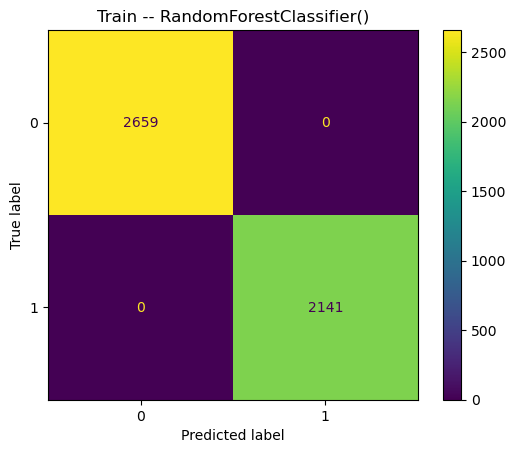

<Figure size 640x480 with 0 Axes>

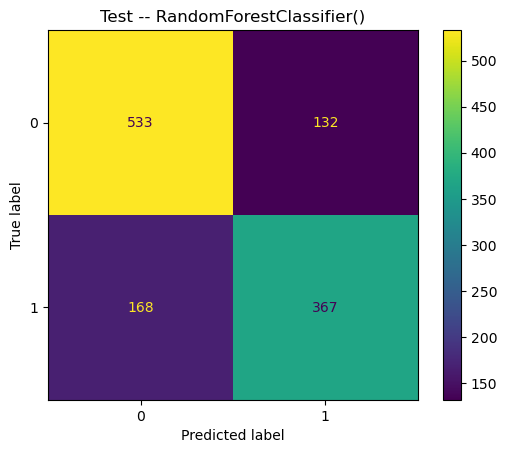

Train Acc : 0.7435416666666667
Test Acc : 0.7175
Train recall : 0.5651564689397478
Test recall : 0.5420560747663551
Train precision : 0.8013245033112583
Test precision : 0.7552083333333334
Train f1_score : 0.6628321007943029
Test f1_score : 0.6311207834602829


<Figure size 640x480 with 0 Axes>

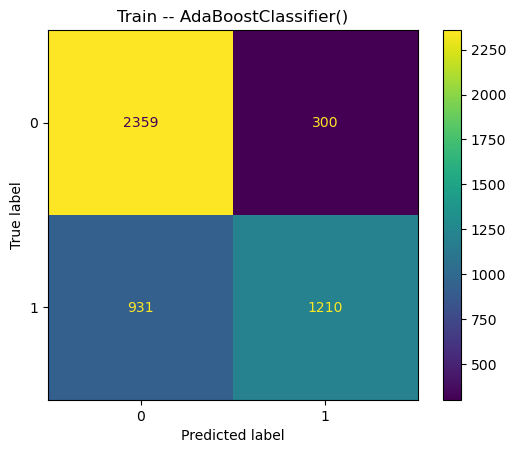

<Figure size 640x480 with 0 Axes>

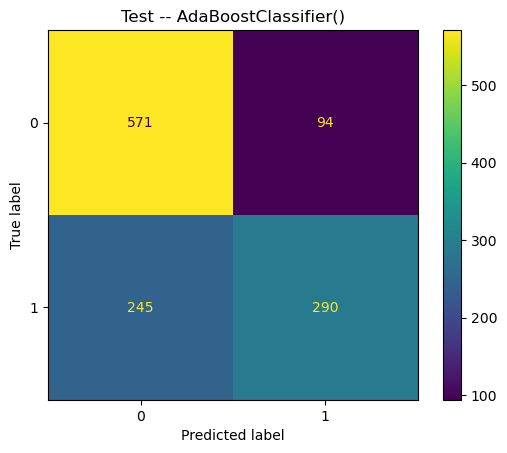

Train Acc : 0.7814583333333334
Test Acc : 0.7441666666666666
Train recall : 0.6595049042503504
Test recall : 0.6242990654205608
Train precision : 0.815242494226328
Test precision : 0.759090909090909
Train f1_score : 0.7291505293054481
Test f1_score : 0.685128205128205


<Figure size 640x480 with 0 Axes>

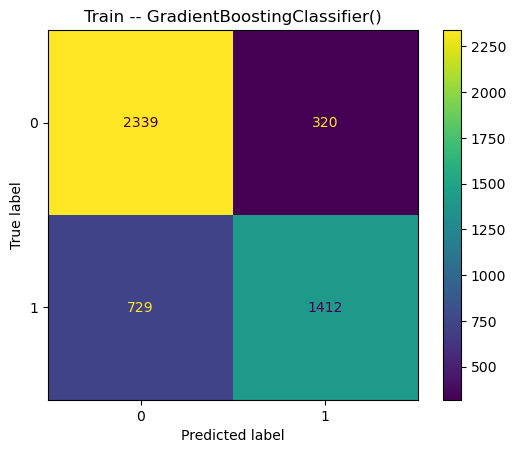

<Figure size 640x480 with 0 Axes>

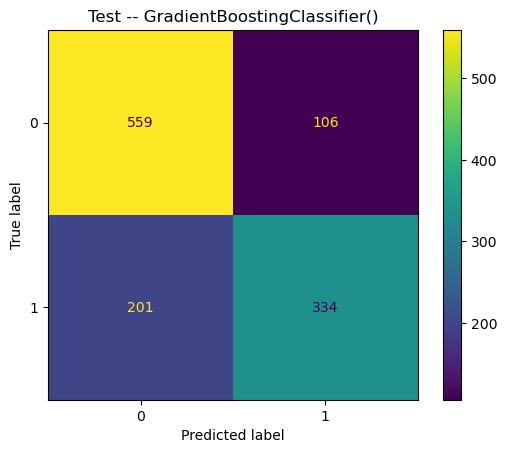

Train Acc : 0.8972916666666667
Test Acc : 0.7475
Train recall : 0.8570761326482952
Test recall : 0.7102803738317757
Train precision : 0.907517309594461
Test precision : 0.7196969696969697
Train f1_score : 0.8815757866922892
Test f1_score : 0.7149576669802444


<Figure size 640x480 with 0 Axes>

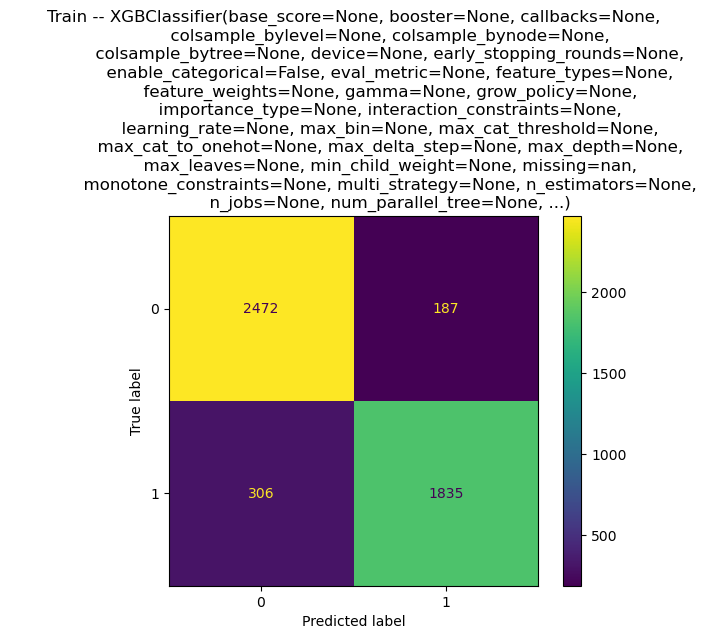

<Figure size 640x480 with 0 Axes>

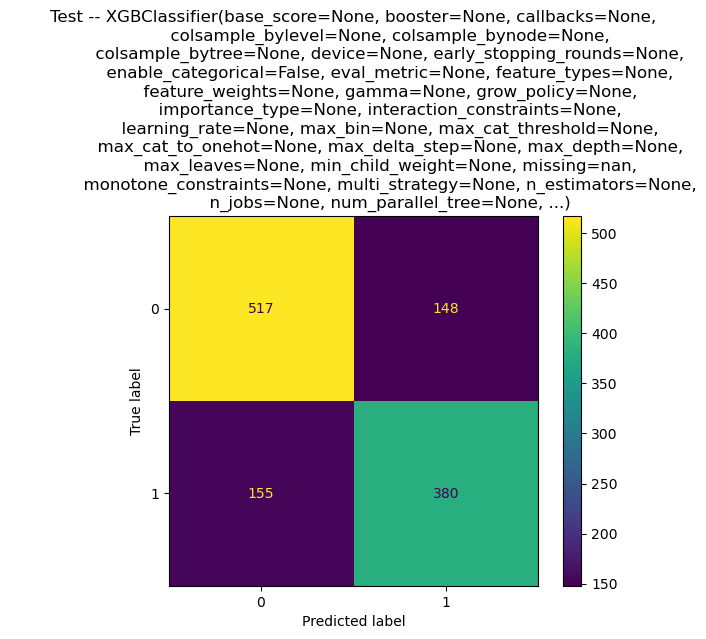

In [37]:
for model in models :

    Modeling(x_train , x_test ,y_train , y_test , model)

In [38]:
svc_search.fit(x, y)

C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transf

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('pca', PCA()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [0.95, 0.99, 10, 20],
                         'polynomialfeatures__degree': [1, 2, 3],
                         'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [40]:
svc_search.best_score_

0.7445

In [41]:
lr_srch.fit(x , y)
lr_srch.best_score_

C:\Users\phmog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6615

In [42]:
dt = make_pipeline(StandardScaler() , DecisionTreeClassifier())
dt

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [43]:
dt_param = [
    {
        'decisiontreeclassifier__criterion' : ["gini", "entropy", "log_loss"],
        'decisiontreeclassifier__splitter' : ["best", "random"],
        'decisiontreeclassifier__max_depth' : list(range(3 , 21 , 3)),
        'decisiontreeclassifier__min_samples_split' : [2,3,4,5,6]
    }
]

In [44]:
dt_srch = GridSearchCV(estimator=dt , 
                       param_grid=dt_param ,
                       scoring='accuracy' ,
                       cv = StratifiedKFold(n_splits=5) ,
                       return_train_score=True )

In [45]:
dt_srch.fit(x , y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                'entropy',
                                                                'log_loss'],
                          'decisiontreeclassifier__max_depth': [3, 6, 9, 12, 15,
                                                                18],
                          'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                        5, 6],
                          'decisiontreeclassifier__splitter': ['best',
                                                               'random']}],
             return_train_score=True, scoring='accuracy')

In [46]:
dt_srch.best_score_

0.6366666666666666

In [47]:
svc_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('pca', PCA(n_components=0.99)), ('svc', SVC(C=10))])

In [54]:
joblib.dump(svc_search.best_estimator_, 'svc.h5')

['svc.h5']

In [60]:
x.describe()

,Active users,Sessions,Event count,Key events
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,5.609123,5.998856,7.914282,6.111342
std,1.697600,1.524164,1.395532,1.484190
min,0.693147,0.693147,2.708050,1.098612
25%,4.672829,5.075174,7.013915,5.187386
50%,5.600270,5.902633,7.714231,5.981414
75%,6.646391,6.861187,8.665010,6.929027
max,17.365016,17.787692,21.182186,19.831855
